## **DSCI 100 Final Project**

This report analyzes data from the Minecraft Server created by a UBC research group led by Frank Wood. In doing so, this project sets out to find **which variables in the *players.csv* data set are the best predictors of newsletter subscription**. This will be an important first step towards answering the broad question of interest:

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**


The *players.csv* dataset consists of the following variables:

**experience:**
This variable measures each player's experience classification.

**subscription:**
This variable measures each player's subscription status.

**hashedEmail:**
This variable appears to be an encrypted version of each player's email address.

**played_hours:**
This variable measures the total hours played by each player.

**name:**
This variable contains each player's name.

**gender:**
This variable contains information on each player's gender identification.

**Age:**
This variable contains information on each player's age.

**General Methodology:**
In this report, when plausible we will conduct and optimize K-NN classification algorithm for every variable that we consider to be a relevant predictor of subscription status, that is, we are excluding the *hashedEmail* and *name* columns from our analysis. Then we will compare various methods of testing these models that we have learned throughout the course such as Accuracy, Precision, and Recall. 



In [2]:
print("Loading data")

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
players <- read_csv("Data/players.csv")

[1] "Loading data"


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Methods & Results:
- describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
- loads data 
- wrangles and cleans the data to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 

note: all figures should have a figure number and a legend

**Indira:** I will determining if gender is a good predictor of subscription status. 

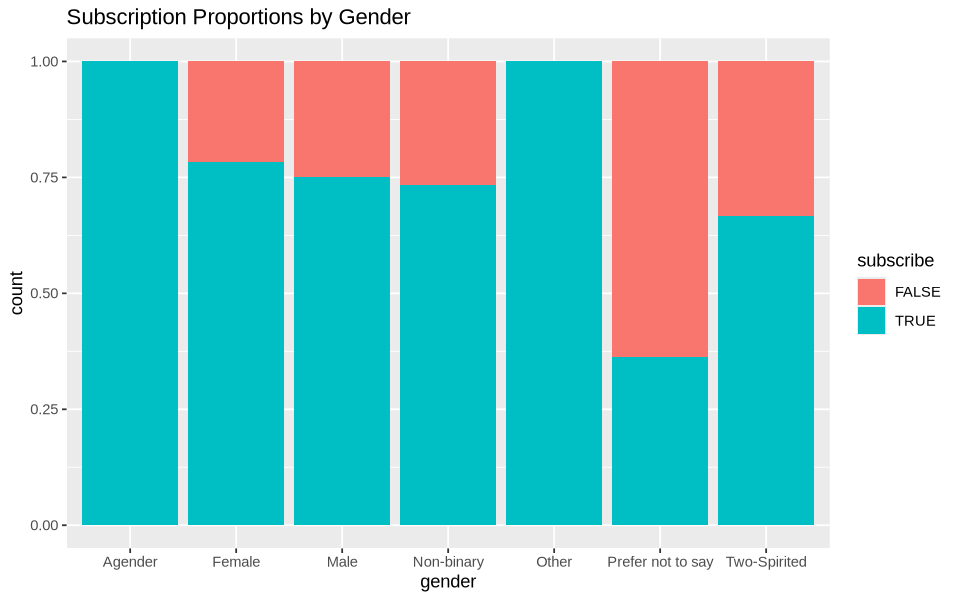

In [3]:
players_gender <- players |> select(subscribe, gender) 
#in this step, I wrangled the data so I'm left with my two variables of interest; gender and subscription status

options(repr.plot.width = 8, repr.plot.height = 5)
players_gender_vis <- players_gender |> ggplot(aes(gender, fill = subscribe)) + geom_bar(stat = "count", position = "fill") + 
ggtitle("Subscription Proportions by Gender")
players_gender_vis
#by using a bar graph, and setting position to "fill", we can visualize how subscription proportions differ across genders

Note that since the gender variable does not run on a numeric scale, we cannot perform a k-nn classification analysis on it. Additionally, there is high variability between the proportion of subscribers across gender, making it difficult to determine a pattern based solely on gender. For the most part, we can see from our visualization that non-subscribers make up about 25% or less of results from a given gender. The exceptions are agender and other, in which subscribers make up 100% of the results, and those who preferred not to say, of which around 37-38% of responses are made of non-subscribers. However, we cannot assume causation from the one variable alone, especially with no means of testing new points on it, and the variability in proportion could be because of a large difference in proportion of responders (for example, only one agender individual may have responded versus fifty females, skewing the results for future predictions.)Overall, we can conclude that gender is not a good predictor for someone's subscription status in this dataset.

- I feel as though you could still make predictions, maybe using conditional probability (Martin)

Discussion:
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

## Age as a Predictor for Subscription Status
**Max:** I will be looking at how good of a predictor Age is for Subscription status.

In [4]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**Step 1:**

In [10]:
player_age <- players |>
    select(Age, subscribe) |>
    mutate(subscribe = as_factor(subscribe)) |>
    filter(Age != "NA")

player_age

Age,subscribe
<dbl>,<fct>
9,TRUE
17,TRUE
17,FALSE
⋮,⋮
22,FALSE
57,FALSE
17,FALSE


In this step I selected my two variables of interest, *Age* and *subscribe*. I then converted the subscribe variable into a factor so that it would work within a K-NN classfication algorithhm. Finally, I filtered out the NA values from the age column, now this data is tidied, wrangled and ready to be put into a classification model. 

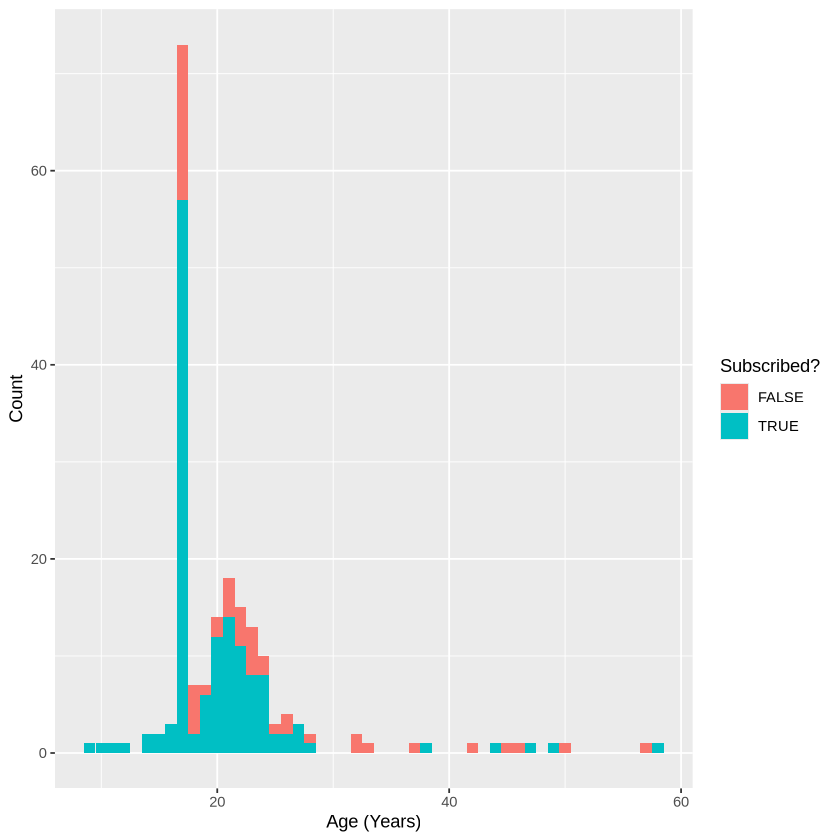

In [11]:
player_age_hist <- player_age |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age (Years)", y = "Count", fill = "Subscribed?")

player_age_hist

**Step 2**

Splitting the dataset into training data and testing data. This seperation allows me to test the accuracy of the model.

In [87]:
# dividing data into training and testing sets
set.seed(9999)
player_age_split <- initial_split(player_age, prop = 0.75, strata = subscribe)
player_age_train <- training(player_age_split)
player_age_test <- testing(player_age_split)

**Step 3**

Determining the optimal number of neighbors for the most accurate knn model using cross fold validation. 

In [101]:
set.seed(9999) #keep results consistent

#recipe
player_age_recipe <- recipe(subscribe ~ Age, data = player_age_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

#knn model
player_age_model_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_mode("classification") |>
    set_engine("kknn")

#player age workflow

vfolds <- vfold_cv(player_age_train, v = 10, strata = subscribe)
k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 1))

player_age_workflow_tune <- workflow() |>
    add_model(player_age_model_tune) |>
    add_recipe(player_age_recipe) |>
    tune_grid(resamples = vfolds, grid = k_vals)


player_age_results <-  player_age_workflow_tune |>
    collect_metrics()

player_age_results |>
    filter(.metric == "accuracy") |>
    slice_max(order_by = mean, n = 1, with_ties = FALSE)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
29,accuracy,binary,0.7450183,10,0.01363246,Preprocessor1_Model29


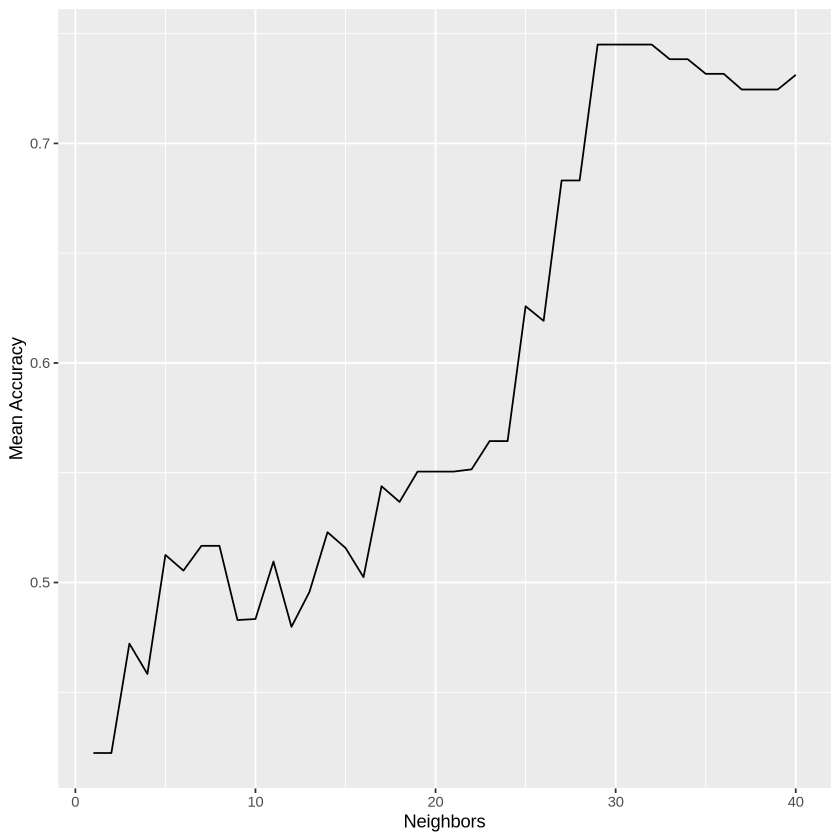

In [102]:
player_age_plot <- player_age_results |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    labs(x = "Neighbors", y = "Mean Accuracy")

player_age_plot

**Step 4**

Using the most accurate number of neighbors to train a knn classification model on the training data, and then testing its accuracy on the testing data to determine how well age is at predicting whether or not a player is subscribed to a gaming-related newsletter.

In [103]:
player_age_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 29) |>
    set_mode("classification") |>
    set_engine("kknn")

player_age_workflow <- workflow() |>
    add_model(player_age_model) |>
    add_recipe(player_age_recipe) |>
    fit(data = player_age_train)

player_age_prediction <- predict(player_age_workflow, player_age_test) |>
                          bind_cols(player_age_test)

subscribed_prediction_accuracy <- player_age_prediction |>
                        metrics(truth = subscribe, estimate = .pred_class)

subscribed_prediction_accuracy |>
    filter(.metric == "accuracy") |>
    select(.metric, .estimate)

.metric,.estimate
<chr>,<dbl>
accuracy,0.7142857


**Final accuracy = 71%**

## Played Hours as a Predictor for Player Subscription Status
**Martin:** I will be looking at whether played hours are a good predictors of player subscription status.

In [8]:
players <- read_csv("Data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Summary Statistics for *played_hours*:**

In [10]:
 hours_played_summary <- players %>%
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE),
    sd_played_hours = sd(played_hours, na.rm = TRUE))
hours_played_summary

mean_played_hours,median_played_hours,min_played_hours,max_played_hours,sd_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,0,223.1,28.35734


**Visually Representing Played Hours Distribution:**

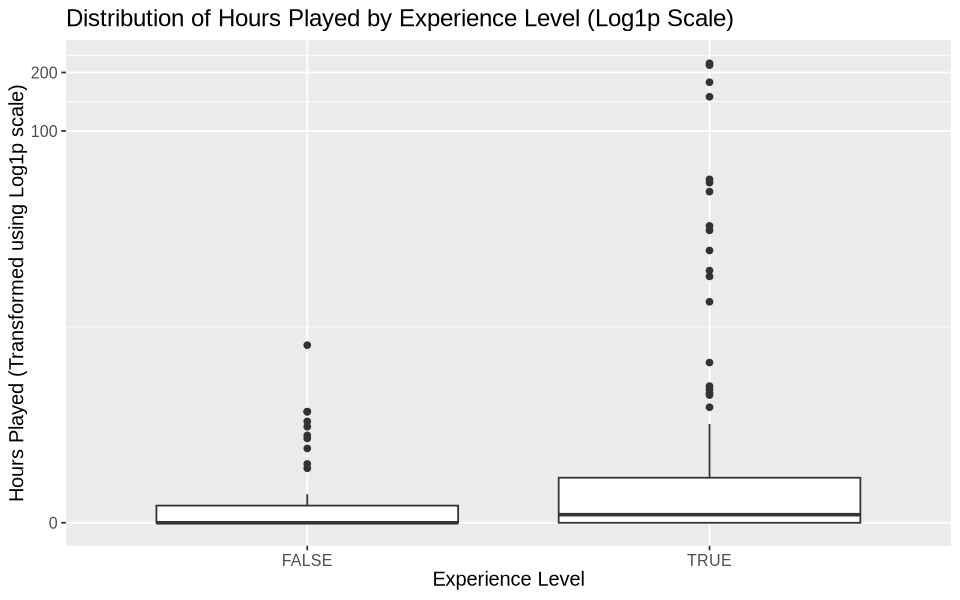

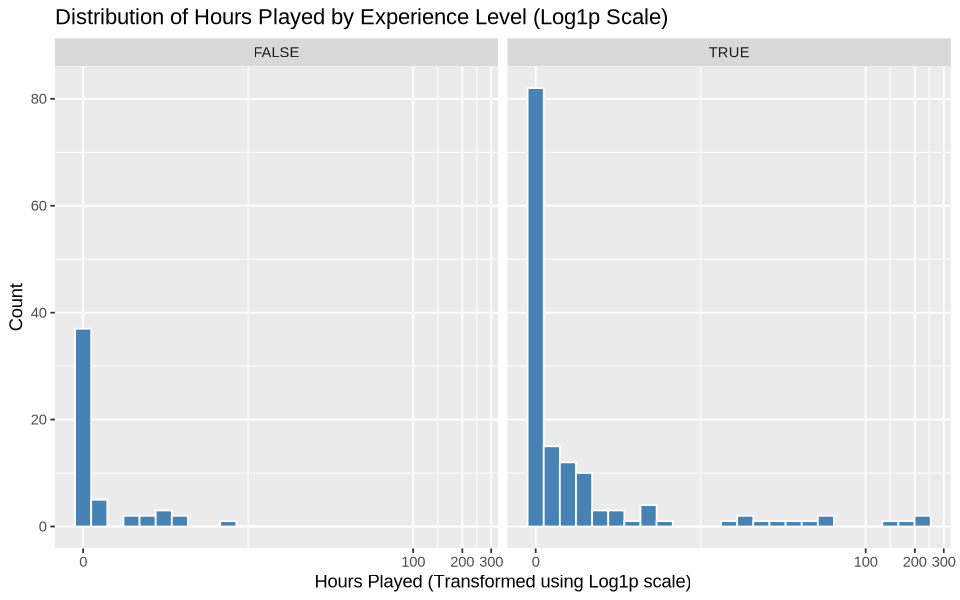

In [12]:
distribution_plot <- players %>%
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  scale_y_continuous(trans = "log1p")+ 
  labs(title = "Distribution of Hours Played by Experience Level (Log1p Scale)",
       x = "Experience Level",
       y = "Hours Played (Transformed using Log1p scale)") +
  theme(text = element_text(size = 12)) 
distribution_plot

histogram_plot <- players %>%
  ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 25, fill = "steelblue", color = "white")+
    facet_grid(cols = vars(subscribe))+
    scale_x_continuous(trans = "log1p")+
    labs(title = "Distribution of Hours Played by Experience Level (Log1p Scale)",
         x = "Hours Played (Transformed using Log1p scale)",
         y = "Count")
histogram_plot
    

While making this plot, I ran into a significant issue because of the number of zero values in the hours_played variable; the distribution was extremely skewed. Because of this, making effective visualizations required the use of the log1p scale to allow the bottom tail of the values and the more extreme outliers to be visible; using a scaling factor of log10 was not applicable because log10(0) is an undefined value.

To answer my question, **Can player hours played be reliable predictors of newsletter subscription status?** I will run a K-NN prediction model with hours played as a predictor of newslletter subscription status. 

**KNN Model:**

**Step 1:** Clean Data

In [29]:
players_cln <- players %>%
    mutate(subscribe = as_factor(subscribe))%>%
    select(subscribe, played_hours) %>%
    drop_na()
players_cln

subscribe,played_hours
<fct>,<dbl>
TRUE,30.3
TRUE,3.8
FALSE,0.0
⋮,⋮
FALSE,0.0
FALSE,2.3
TRUE,0.2


*In the code above, I have converted the original **subscribe** data into a factor data type, and I have also removed all other variables that are not necessary for my analysis*

In [32]:
set.seed(123)

players_split <- initial_split(players_cln, prop = 0.75)
player_train <- training(players_split)
player_test <- testing(players_split)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_mode("classification") %>%
                set_engine("kknn")
knn_recipe <- recipe(subscribe ~ played_hours, data = player_train) %>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors()) 

knn_wf <- workflow() %>%
        add_model(knn_spec) %>%
        add_recipe(knn_recipe)

player_vfolds <- vfold_cv(player_train, v = 5)

knn_results <- tune_grid(
  knn_wf,
  resamples = player_vfolds,
  grid = 20,
  metrics = metric_set(accuracy, recall, precision)
)
collect_metrics(knn_results)



→ A | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be returned.
               Note that 8 true event(s) actually occurred for the problematic event level,
               FALSE

There were issues with some computations   A: x1

→ B | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be returned.
               Note that 7 true event(s) actually occurred for the problematic event level,
               FALSE

There were issues with some computations   A: x1
→ C | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be retur

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6457471,5,0.03100126,Preprocessor1_Model01
2,precision,binary,0.2400000,5,0.07033448,Preprocessor1_Model01
2,recall,binary,0.2007143,5,0.07084044,Preprocessor1_Model01
⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,accuracy,binary,0.7137931,5,0.01910952,Preprocessor1_Model13
14,precision,binary,0.0000000,1,NA,Preprocessor1_Model13
14,recall,binary,0.0000000,5,0.00000000,Preprocessor1_Model13
